In [7]:
from datetime import datetime, timedelta 
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

import observatories
import reference
import data
import correlation
import download

In [2]:
# Properties to control fontsizes in plots
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 16


plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
_year = 2022
_month = 2
_day = 1 
_days = 28


date_start = datetime(year=_year, month=_month, day=_day)
time_step = timedelta(days=1)
number_days = _days

observatory = [observatories.uni_graz, observatories.triest, observatories.swiss_landschlacht, observatories.oe3flb,
               observatories.alaska_haarp, observatories.alaska_cohoe, observatories.roswell, observatories.bir,
               observatories.indonesia, observatories.assa, observatories.swiss_muhen, observatories.swiss_hb9sct,
               observatories.egypt_alexandria, observatories.arecibo]

events_day = []
for i in range(number_days):
    date = date_start + time_step * i
    year = date.year
    month = date.month
    day = date.day
    print(day)
    print(reference.referenceMonstein(year,month, day))
    print(reference.referenceSWPC(year, month, day))

1
[['CTM', 00:00:00, 18:26:00, '1.0000'], ['VI', 18:44:00, 18:59:00, '1.0000'], ['V', 19:12:00, 19:17:00, '1.0000'], ['III', 20:42:00, 20:46:00, '1.0000'], ['III', 21:26:00, 21:26:00, '1.0000']]
[['VI/2', 00:00:00, 00:50:00, '1.0000'], ['III/1', 00:00:00, 09:58:00, '1.0000'], ['VI/2', 01:55:00, 02:54:00, '1.0000'], ['III/1', 03:55:00, 03:56:00, '1.0000'], ['VI/2', 07:36:00, 08:31:00, '1.0000'], ['III/1', 09:17:00, 09:17:00, '1.0000'], ['III/2', 09:59:00, 09:59:00, '1.0000'], ['III/1', 10:58:00, 11:07:00, '1.0000'], ['III/1', 12:58:00, 13:01:00, '1.0000'], ['III/1', 14:19:00, 14:19:00, '1.0000'], ['III/1', 16:07:00, 16:09:00, '1.0000'], ['III/1', 17:40:00, 17:40:00, '1.0000'], ['III/1', 18:45:00, 18:46:00, '1.0000'], ['III/2', 19:13:00, 19:16:00, '1.0000'], ['VI/1', 19:58:00, 20:24:00, '1.0000'], ['III/3', 20:42:00, 20:47:00, '1.0000']]
2
[['III', 00:03:00, 00:03:00, '1.0000'], ['V', 02:05:00, 02:11:00, '1.0000'], ['VI', 02:45:00, 02:58:00, '1.0000'], ['III', 05:35:00, 05:36:00, '1.0000

ValueError: minute must be in 0..59

2022_1_1_AUSTRIA-UNIGRAZ_SWISS-Landschlacht_180_flatten_100.png
[['III', 13:43:32, 13:43:50, '0.6048'], ['III', 13:44:05, 13:44:38, '0.8066']]
2022_1_1_AUSTRIA-UNIGRAZ_SWISS-Landschlacht_45_nobg_binfreq_bintime_4_flatten_100.png
[['III', 13:42:57, 13:43:21, '0.8315'], ['III', 13:43:43, 13:44:24, '0.9537'], ['III', 13:44:41, 13:44:41, '0.8655']]


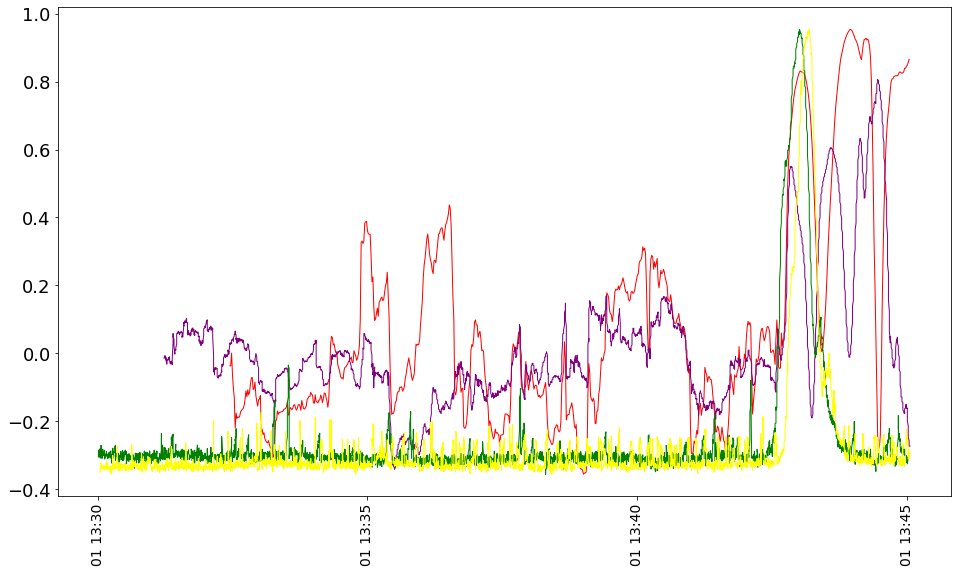

In [4]:
obs = [observatories.uni_graz,              # 0
       observatories.triest,                # 1
       observatories.swiss_landschlacht,    # 2
       observatories.oe3flb,                # 3
       observatories.alaska_haarp,          # 4
       observatories.alaska_cohoe,          # 5
       observatories.roswell,               # 6
       observatories.bir,                   # 7
       observatories.indonesia,             # 8
       observatories.assa,                  # 9
       observatories.swiss_muhen,           # 10
       observatories.swiss_hb9sct,          # 11
       observatories.egypt_alexandria,      # 12
       observatories.arecibo,               # 13
       observatories.greenland]

obs1 = obs[0]
obs2 = obs[2]

type2 = {"year":2017,"month":9,"day":6, "time":"12:04:00"}
type3 = {"year":2022,"month":1,"day":1, "time":"13:35:00"}
type4 = {"year":2022,"month":2,"day":13, "time":"13:47:00", "time2":"13:37:00"}
ctm = {"year":2022,"month":1,"day":31, "time":"08:40:00", "time2":"08:25:00"}
typeu = {"year":2022,"month":1,"day":12, "time":"11:50:00"}

run = type3

year = run['year']
month = run['month']
day = run['day']
time = run['time']

dp1 = data.createFromTime(year, month, day, time, obs1, [45, 81])
dp2 = data.createFromTime(year, month, day, time, obs2, [45, 81])
cor1 = correlation.Correlation(dp1, dp2, day=day, _flatten=True, _bin_time=False, _bin_freq=False, _no_background=False,
                               _r_window=180)
cor1.calculatePeaks(_limit=0.6)
print(cor1.fileName())
print(cor1.peaks)

dp1 = data.createFromTime(year, month, day, time, obs1, [45, 81])
dp2 = data.createFromTime(year, month, day, time, obs2, [45, 81])
cor = correlation.Correlation(dp1, dp2, day=day, _flatten=True, _bin_time=True, _bin_freq=True, _no_background=True,
                              _r_window=45)
cor.calculatePeaks()
print(cor.fileName())
print(cor.peaks)

dp1 = data.createFromTime(year, month, day, time, obs1, [45, 81])
dp2 = data.createFromTime(year, month, day, time, obs2, [45, 81])
dp1.createSummedCurve([45,81])
dp2.createSummedCurve([45,81])

fig3, ax3 = plt.subplots(figsize=(16, 9))
cor.plotCurve(ax3)
cor1.plotCurve(ax3)

dp1.plotSummedCurve(ax3)
dp2.plotSummedCurve(ax3)


plt.show()

2022_2_13_GREENLAND_Arecibo-Observatory_180_flatten_100.png
[['III', 13:47:09, 13:47:22, '0.6359']]
2022_2_13_GREENLAND_Arecibo-Observatory_50_nobg_binfreq_bintime_4_flatten_100.png
[['III', 13:47:17, 13:47:45, '0.8519']]


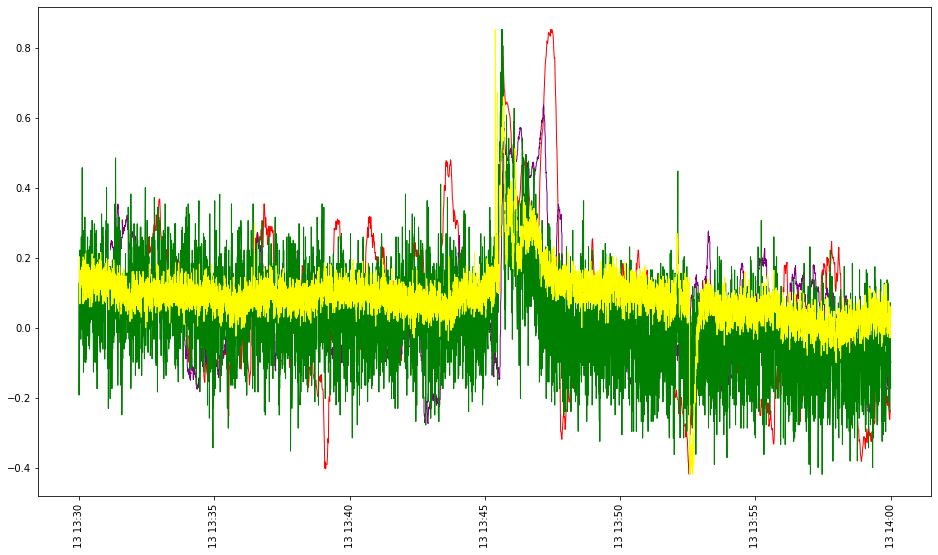

In [3]:
obs = [observatories.uni_graz,              # 0
       observatories.triest,                # 1
       observatories.swiss_landschlacht,    # 2
       observatories.oe3flb,                # 3
       observatories.alaska_haarp,          # 4
       observatories.alaska_cohoe,          # 5
       observatories.roswell,               # 6
       observatories.bir,                   # 7
       observatories.indonesia,             # 8
       observatories.assa,                  # 9
       observatories.swiss_muhen,           # 10
       observatories.swiss_hb9sct,          # 11
       observatories.egypt_alexandria,      # 12
       observatories.arecibo,               # 13
       observatories.greenland]

obs1 = obs[1]
obs2 = obs[13]

type2 = {"year":2017,"month":9,"day":6, "time":"12:04:00"}
type3 = {"year":2022,"month":1,"day":1, "time":"13:35:00"}
type4 = {"year":2022,"month":2,"day":13, "time":"13:47:00", "time2":"13:37:00"}

run = type4

year = run['year']
month = run['month']
day = run['day']
time = run['time']
time2 = run['time2']

dp11= data.createFromTime(year, month, day, time, obs1, [45, 81])
dp12 = data.createFromTime(year, month, day, time2, obs1, [45, 81])
dp21= data.createFromTime(year, month, day, time, obs2, [45, 81])
dp22 = data.createFromTime(year, month, day, time2, obs2, [45, 81])
dp1 = dp11+dp12
dp2 = dp21+dp22

cor1 = correlation.Correlation(dp1, dp2, day=day, _flatten=True, _bin_time=False, _bin_freq=False, _no_background=False,
                               _r_window=180)
cor1.calculatePeaks(_limit=0.6)
print(cor1.fileName())
print(cor1.peaks)

dp11= data.createFromTime(year, month, day, time, obs1, [45, 81])
dp12 = data.createFromTime(year, month, day, time2, obs1, [45, 81])
dp21= data.createFromTime(year, month, day, time, obs2, [45, 81])
dp22 = data.createFromTime(year, month, day, time2, obs2, [45, 81])
dp1 = dp11+dp12
dp2 = dp21+dp22

cor = correlation.Correlation(dp1, dp2, day=day, _flatten=True, _bin_time=True, _bin_freq=True, _no_background=True,
                              _r_window=50)
cor.calculatePeaks()
print(cor.fileName())
print(cor.peaks)

dp11= data.createFromTime(year, month, day, time, obs1, [45, 81])
dp12 = data.createFromTime(year, month, day, time2, obs1, [45, 81])
dp21= data.createFromTime(year, month, day, time, obs2, [45, 81])
dp22 = data.createFromTime(year, month, day, time2, obs2, [45, 81])
dp1 = dp11+dp12
dp2 = dp21+dp22
dp1.createSummedCurve([45,81])
dp2.createSummedCurve([45,81])

fig3, ax3 = plt.subplots(figsize=(16, 9))
cor.plotCurve(ax3)
cor1.plotCurve(ax3)

dp1.plotSummedCurve(ax3)
dp2.plotSummedCurve(ax3)


plt.show()

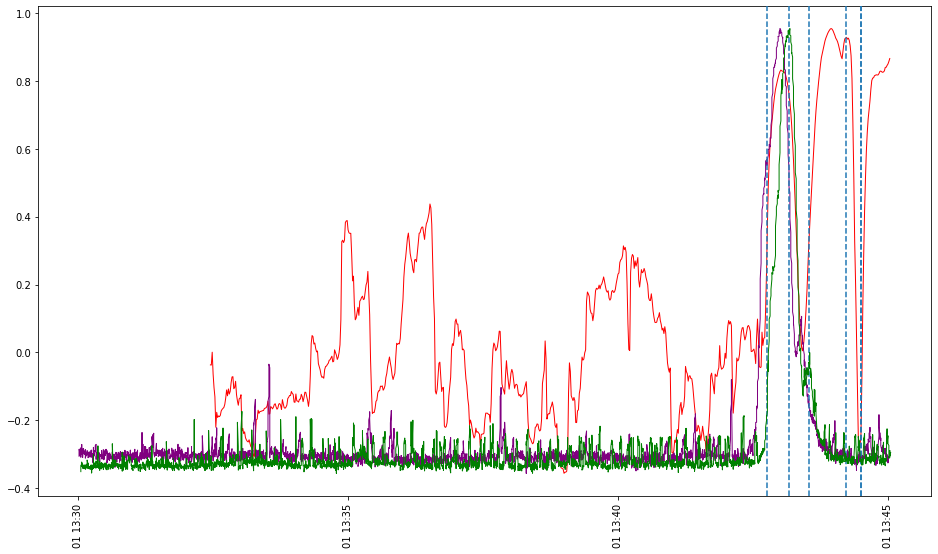

In [15]:
testsize=int(45/4)

peaks = []
for i in cor.peaks:
    peaks.append(str(i.time_start-timedelta(seconds=testsize)))
    peaks.append(str(i.time_end-timedelta(seconds=testsize)))

fig3, ax3 = plt.subplots(figsize=(16, 9))
cor.plotCurve(ax3)

dp1.plotSummedCurve(ax3, peaks=peaks)
dp2.plotSummedCurve(ax3)

plt.savefig('demo.png', transparent=True)
plt.show()

show, that flattening removes data from the front, but doesnt change curve itself

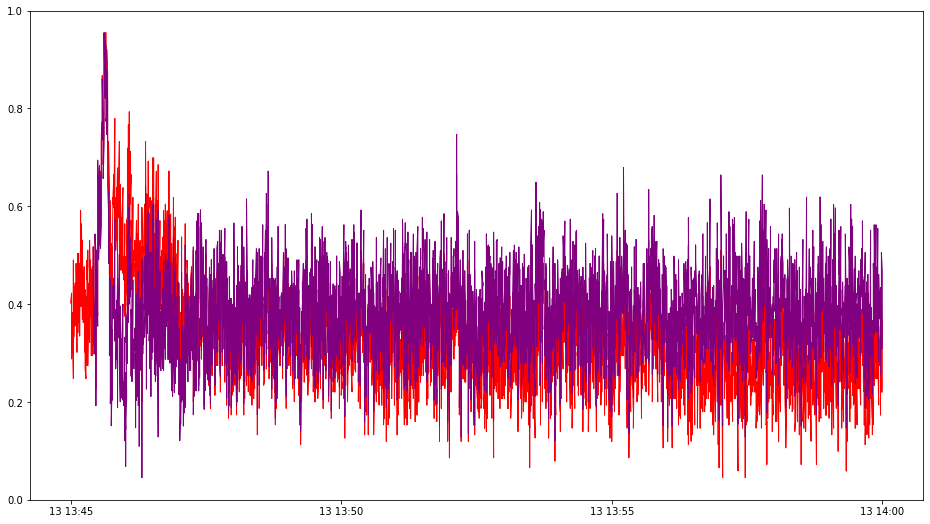

In [21]:
dp1 = data.createFromTime(year, month, day, time, obs1, [45, 81])
dp2 = data.createFromTime(year, month, day, time, obs1, [45, 81])

dp1.createSummedCurve([45,81])
dp2.createSummedCurve([45,81])
dp1.flattenSummedCurve(rolling_window=100)

fig, ax = plt.subplots(figsize=(16,9))
dp2.plotSummedCurve(ax)
dp1.plotSummedCurve(ax)

plt.show()

plot spectrum and subregions where bursts are - timedelta is NOT scientific

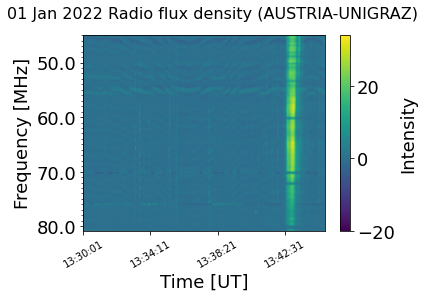

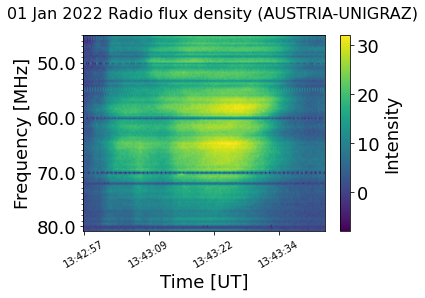

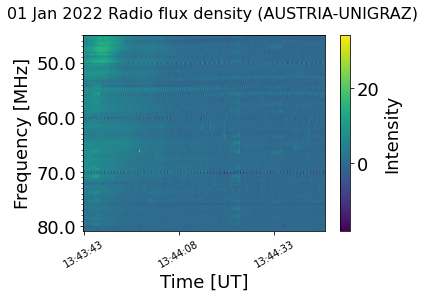

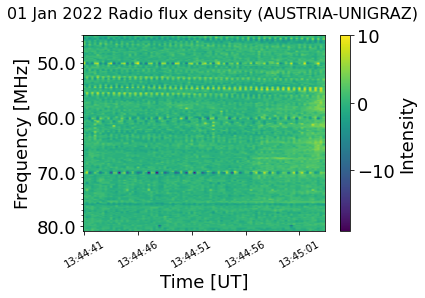

In [11]:
dpt = data.createFromTime(run['year'],run['month'],run['day'],run['time'],observatories.uni_graz,[45,81])
dpt.createSummedCurve([dpt.spectrum_data.freq_axis[-1], dpt.spectrum_data.freq_axis[0]])
dpt.subtract_background()
dpt.plot()
for i in cor.peaks:
    dpt_sub = data.createFromTime(run['year'],run['month'],run['day'],run['time'],observatories.uni_graz,[45,81])
    dpt_sub.subtract_background()
    peak = i
    del_start = int((peak.time_start - dpt_sub.spectrum_data.start - timedelta(seconds=(22.5))).total_seconds()*4)
    del_end = int((peak.time_end - dpt_sub.spectrum_data.start - timedelta(seconds=(0))).total_seconds()*4)
    dpt_sub.spectrum_data.data = dpt_sub.spectrum_data.data[:,del_start:del_end]
    dpt_sub.spectrum_data.start = peak.time_start
    dpt_sub.plot()

# properly plot image + data + correlation + dates + pretty

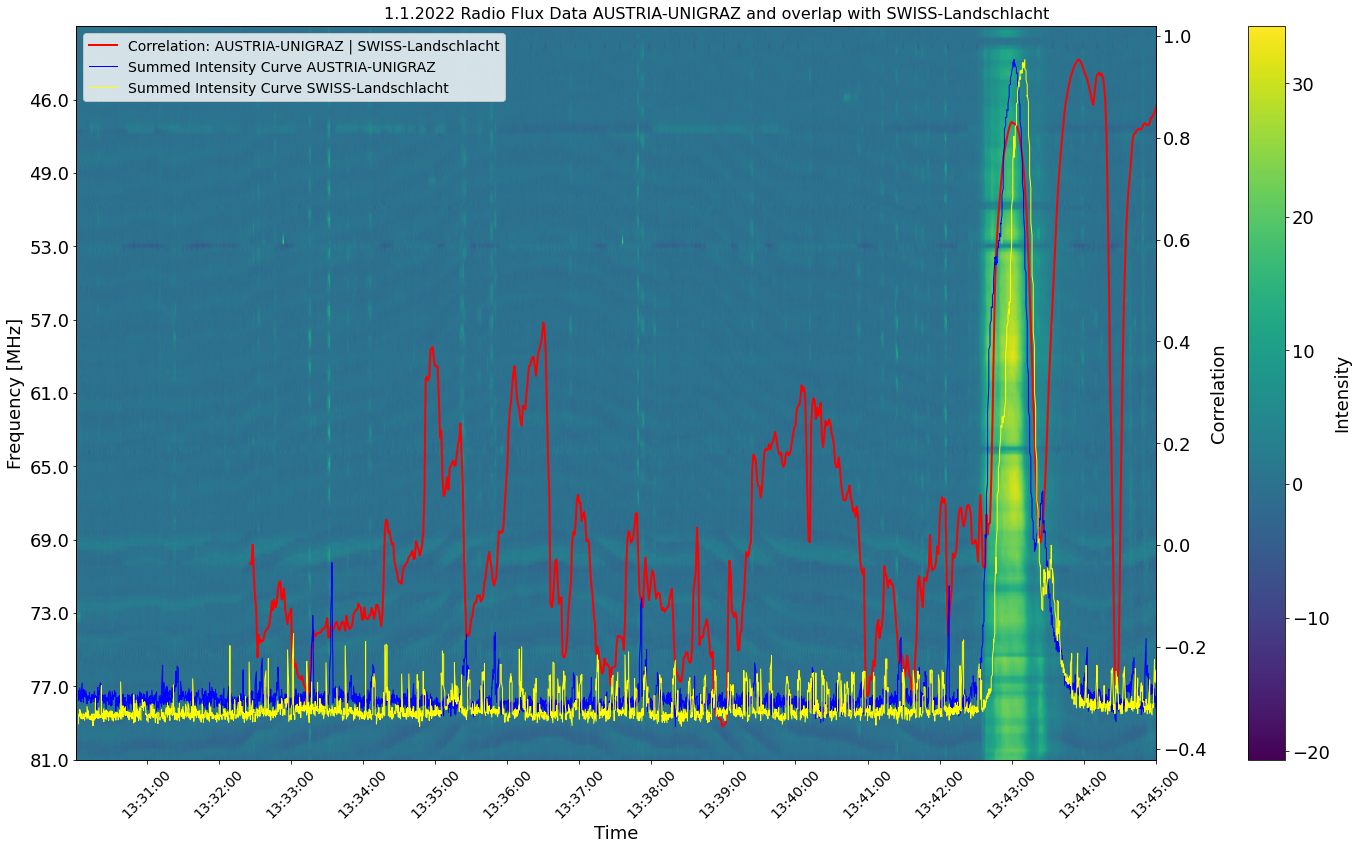

In [67]:
_time = dpt.spectrum_data.time_axis[::4][:-1]
_time2 = dpt.spectrum_data.time_axis
_time_start = cor.time_start
_data = cor.data_curve

t = np.arange(dpt.spectrum_data.start.strftime("%Y-%m-%dT%H:%M:%S.%z"),
              dpt.spectrum_data.end.strftime("%Y-%m-%dT%H:%M:%S.%z"), dtype='datetime64[s]').astype(datetime)
mt = mdates.date2num((t[0],t[-1]))

a=20
b=12
fig, ax = plt.subplots(figsize=(a,b))
fig.suptitle(f"{day}.{month}.{year} Radio Flux Data {dpt.observatory.name} and overlap with {cor.data_point_2.observatory.name}")
ax.set_xlabel("Time")
ax.set_ylabel("Frequency [MHz]")
plt.imshow(dpt.spectrum_data.data, extent=[mt[0],mt[1], 0, 900/a*b], aspect='auto')
cbar = plt.colorbar(location='right', anchor=(.15,0.0))
cbar.set_label("Intensity")
ax.set_yticks([i for i in range(0,int(900/a*b), int(900/a*b/10))],
              np.around(dpt.spectrum_data.freq_axis[::int(len(dpt.spectrum_data.freq_axis)/9)], 0))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

ax2 = plt.twinx(ax)

time_axis_plot = []
for i in _time:
    time_axis_plot.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
time_axis_plot = pd.to_datetime(time_axis_plot)
dataframe = pd.DataFrame()
dataframe['data'] = _data
dataframe = dataframe.set_index(time_axis_plot)

plot_cor = ax2.plot(dataframe, color="red", linewidth=2, label=f"Correlation: {cor.data_point_1.observatory.name} | {cor.data_point_2.observatory.name}")
ax2.set_ylabel("Correlation")

ax3 = plt.twinx(ax)
# ax3.spines["right"].set_position(("axes", 1.2))
# ax3.yaxis.get_offset_text().set_position((1.2,1))
# ax3.set_ylabel("data")
ax3.set_axis_off()
time_axis_plot2 = []
for i in _time2:
    time_axis_plot2.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
time_axis_plot2 = pd.to_datetime(time_axis_plot2)
dataframe2 = pd.DataFrame()
dataframe2['data'] = dpt.summedCurve
dataframe2 = dataframe2.set_index(time_axis_plot2)
plot_dat = ax3.plot(dataframe2, color="blue", linewidth=1, label=f"Summed Intensity Curve {dpt.observatory.name}")

ax4 = plt.twinx(ax)
ax4.set_axis_off()
time_axis_plot3 = []
dataframe3 = pd.DataFrame()
dataframe3['data'] = dp2.summedCurve
dataframe3 = dataframe3.set_index(time_axis_plot2)
plot_dat2 = ax4.plot(dataframe3, color="yellow", linewidth=1, label=f"Summed Intensity Curve {dp2.observatory.name}")


plots = plot_cor + plot_dat + plot_dat2
labs = [l.get_label() for l in plots]
ax.legend(plots, labs, loc="upper left")
plt.tight_layout()
plt.show()

here be calculations for stddev for different bursts
please ignore

In [22]:
print("type3 strong ")
print("std ", np.std(dpt.spectrum_data.data))
print("mean ", np.nanmean(dpt.spectrum_data.data))
print("max ", np.nanmax(dpt.spectrum_data.data))

type3
std  11.417173801121235
mean  184.9920873397436
max  222


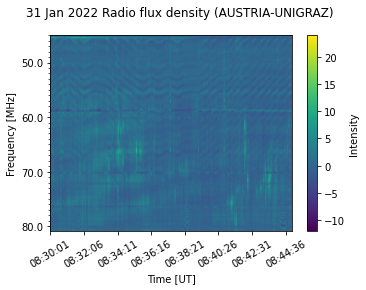

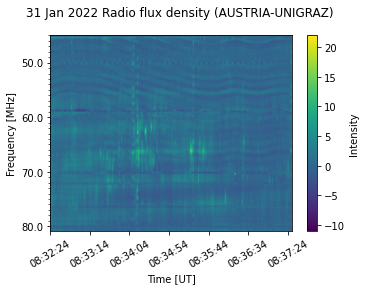

ctm
std  1.8046669288069213
mean  0.615442878540304
max  22.894444444444446


In [27]:
dpt = data.createFromTime(run['year'],run['month'],run['day'],run['time'],observatories.uni_graz,[45,81])
dpt.subtract_background()
dpt.plot()
peak = cor1.peaks[0]
del_start = int((peak.time_start - dpt.spectrum_data.start).total_seconds()*4)
del_end = int((peak.time_end - dpt.spectrum_data.start).total_seconds()*4)
dpt.spectrum_data.data = dpt.spectrum_data.data[:,del_start:del_end]
dpt.spectrum_data.start = peak.time_start
dpt.plot()
print("ctm")
print("std ", np.std(dpt.spectrum_data.data))
print("mean ", np.nanmean(dpt.spectrum_data.data))
print("max ", np.nanmax(dpt.spectrum_data.data))

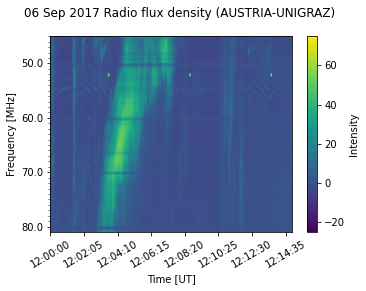

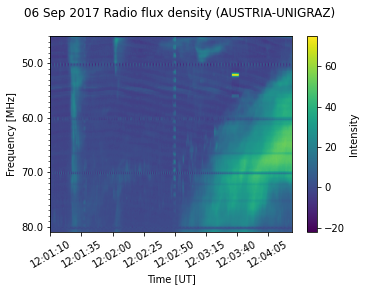

type2
std  12.494499317890439
mean  6.699476940883191
max  75.8388888888889


In [30]:
dpt = data.createFromTime(run['year'],run['month'],run['day'],run['time'],observatories.uni_graz,[45,81])
dpt.subtract_background()
dpt.plot()
peak = cor1.peaks[0]
del_start = int((peak.time_start - dpt.spectrum_data.start).total_seconds()*4)
del_end = int((peak.time_end - dpt.spectrum_data.start).total_seconds()*4)
dpt.spectrum_data.data = dpt.spectrum_data.data[:,del_start:del_end]
dpt.spectrum_data.start = peak.time_start
dpt.plot()
print("type2")
print("std ", np.std(dpt.spectrum_data.data))
print("mean ", np.nanmean(dpt.spectrum_data.data))
print("max ", np.nanmax(dpt.spectrum_data.data))

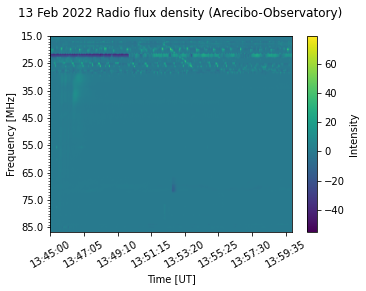

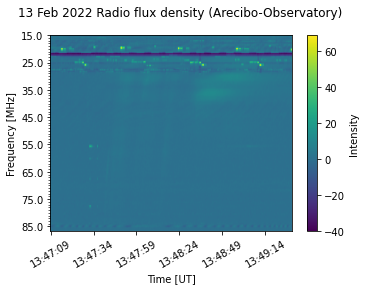

weak type IV
std  4.7160824243526385
mean  0.7121977196611501
max  69.32222222222222


In [38]:
dpt = data.createFromTime(run['year'],run['month'],run['day'],run['time'],observatories.arecibo,[45,81])
dpt.subtract_background()
dpt.plot()
peak = cor1.peaks[0]
del_start = int((peak.time_start - dpt.spectrum_data.start).total_seconds()*4)*0
del_end = int((peak.time_end - dpt.spectrum_data.start).total_seconds()*4)
dpt.spectrum_data.data = dpt.spectrum_data.data[:,del_start:del_end]
dpt.spectrum_data.start = peak.time_start
dpt.plot()
print("weak type IV")
print("std ", np.std(dpt.spectrum_data.data))
print("mean ", np.nanmean(dpt.spectrum_data.data))
print("max ", np.nanmax(dpt.spectrum_data.data))

savedata to files | load data from files 

In [58]:
import pickle
print(cor.peaks)
with open("test_file", "wb") as file:
    pickle.dump(cor, file)
with open("test_file", "rb") as read_file:
    loaded_data = pickle.load(read_file)
loaded_data.peaks

[['III', 13:42:57, 13:43:21, '0.8315'], ['III', 13:43:43, 13:44:24, '0.9537'], ['III', 13:44:41, 13:44:41, '0.8655']]


[['III', 13:42:57, 13:43:21, '0.8315'], ['III', 13:43:43, 13:44:24, '0.9537'], ['III', 13:44:41, 13:44:41, '0.8655']]